# EDA on Bank Stocks

In [113]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import pandas_datareader as dr
%matplotlib inline

In [3]:
bank_stocks = pd.read_pickle("all_banks") 

In [4]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [5]:
bank_stocks.columns.names = (['Bank_Ticker', 'Stock_Info'])

# Exploratory Data Analysis

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

What is the max Close price for each bank's stock throughout the time period?

In [6]:
bank_stocks.head()

Bank_Ticker    BAC                                     C                       \
Stock_Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank_Ticker           ...     MS                                  WFC         \
Stock_Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank_Ticker                          
Stock_Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [7]:
tickers = ["BAC","C","GS","JPM","MS","WFC"]

In [11]:
for symbol in tickers:
   print( symbol,bank_stocks[symbol]["Close"].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


Create a new empty DataFrame to contain the returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [19]:
return_of_investment = pd.DataFrame()

We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [23]:
for symbol in tickers:
    return_of_investment[symbol + " Return"] = bank_stocks[symbol]["Close"].pct_change()

In [48]:
return_of_investment.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?

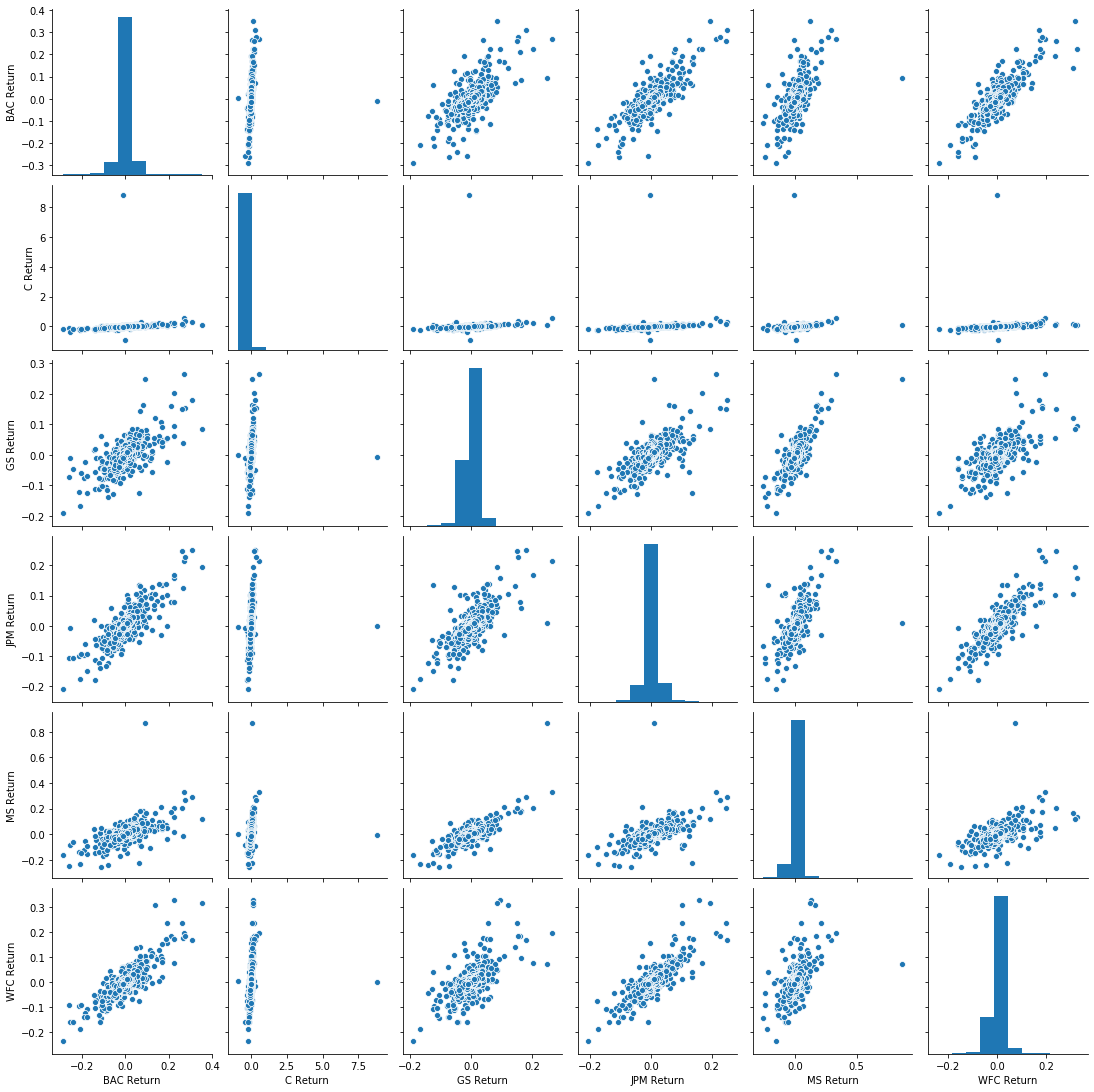

In [34]:
import seaborn as sns
sns.pairplot(return_of_investment)

From the above graphs, returns of Citigroup bank (C) shows a weird pairplot because of the economic crash that occured in the year 2008.

Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [36]:
# Gets the date and time of the data that has the specified minimum value.
return_of_investment.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [39]:
# Gets the date and time of the data that has the specified maximum value.
return_of_investment.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

The Citigroup's largest drop and biggest gain were very close to one another, this is due to the stock split decission which was taken by the company at that time.

which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [40]:
# Overall risk factor by calculating the standard deviation for all the banks from all durations.
return_of_investment.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

Since the City group stocks has higher standard deviation, it is considered as the riskiest stock 

In [59]:
# Riskiest banks in the year 2015
return_of_investment.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Very similar risk profiles observed from the above extraction.

Create a distplot using seaborn of the 2015 returns for Morgan Stanley

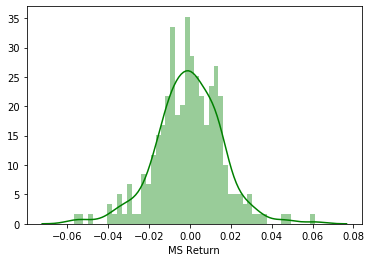

In [68]:
sns.distplot(return_of_investment.loc['2015-01-01':'2015-12-31']["MS Return"],bins=50,color="g")

The returns from Morgan Stanley is very stable as the deviation is only 0.06 from the centre.

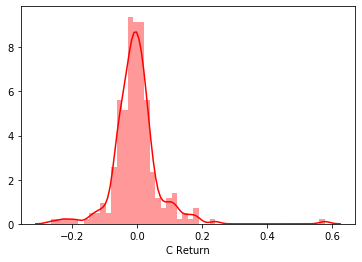

In [71]:
sns.distplot(return_of_investment.loc['2008-01-01':'2008-12-31']["C Return"],bins=50,color="r")

The above distplot of the 2008 returns for CitiGroup shows that the bank was not doing well in 2008.

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Create a line plot showing Close price for each bank for the entire index of time.

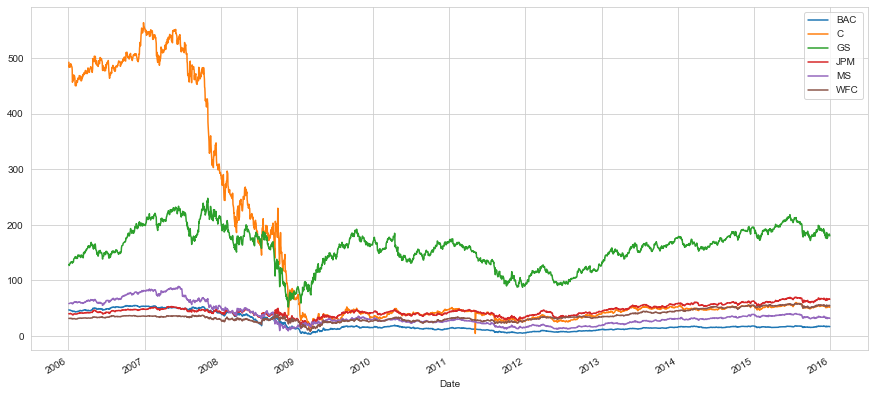

In [94]:
for symbols in tickers:
    bank_stocks[symbols]["Close"].plot(label=symbols,figsize=(15,7))
    sns.set_style("whitegrid")
plt.legend()

It is evident from the above graph that all bank stocks took a dip in the year 2018